In [9]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END
import random
from IPython.display import Image,display

In [26]:
#define state
class State(TypedDict):
    player_name: str
    target_number:int
    gusses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    result: str

In [38]:
### define actions
def setup(state:State)->State:
    state['target_number'] = random.randint(state['lower_bound'],state['upper_bound'])
    state['attempts'] = 0
    state['gusses'] = []
    return state

def guess(state:State)->State:
    state['attempts'] += 1
    state['gusses'].append(random.randint(state['lower_bound'],state['upper_bound']))
    return state

def hint(state:State)->State:
    if state['gusses'][-1] > state['target_number']:
        state['result'] = 'go lower'
        state['upper_bound'] = state['gusses'][-1]

    elif state['gusses'][-1] < state['target_number']:
        state['result'] = 'go higher'
        state['lower_bound'] = state['gusses'][-1]

    else:
        state['result'] = 'you are right!'
    
    return state

def loop_condition(state:State)->State:
    if state['attempts'] > 7:
        state['result'] = 'game over! you lost!'
        return "end"
    
    elif state["gusses"][-1] == state['target_number']:
        state['result'] = 'you won!'
        return "end"
    
    else:
        return "give hint"


In [39]:
graph = StateGraph(State)

### add nodes and actions
graph.add_node("setup",setup)
graph.add_node("guess",guess)
graph.add_node("hint",hint)

### add edges
graph.add_edge(START,"setup")
graph.add_edge("setup","guess")
graph.add_edge("guess","hint")
graph.add_conditional_edges(
    "hint",
    loop_condition,
    {
        "end":END,
        "give hint":"guess"
    }
)
### compile graph
app = graph.compile()

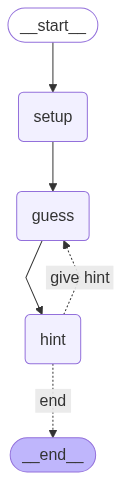

In [40]:
display(Image(app.get_graph().draw_mermaid_png()))

In [42]:
state = State(player_name="Ahmed", target_number = 0,guesses=[], attempts=0, lower_bound=0, upper_bound=20,result='')
answer = app.invoke(state)
answer

{'player_name': 'Ahmed',
 'target_number': 17,
 'gusses': [14, 18, 16, 17],
 'attempts': 4,
 'lower_bound': 16,
 'upper_bound': 18,
 'result': 'you are right!'}